In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('../input/headbrain/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [31]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2


# y = m*x + c
m = numer/denom
c = mean_y - (m * mean_x)

#Print coefficient
print(m, c)

0.26342933948939945 325.57342104944223


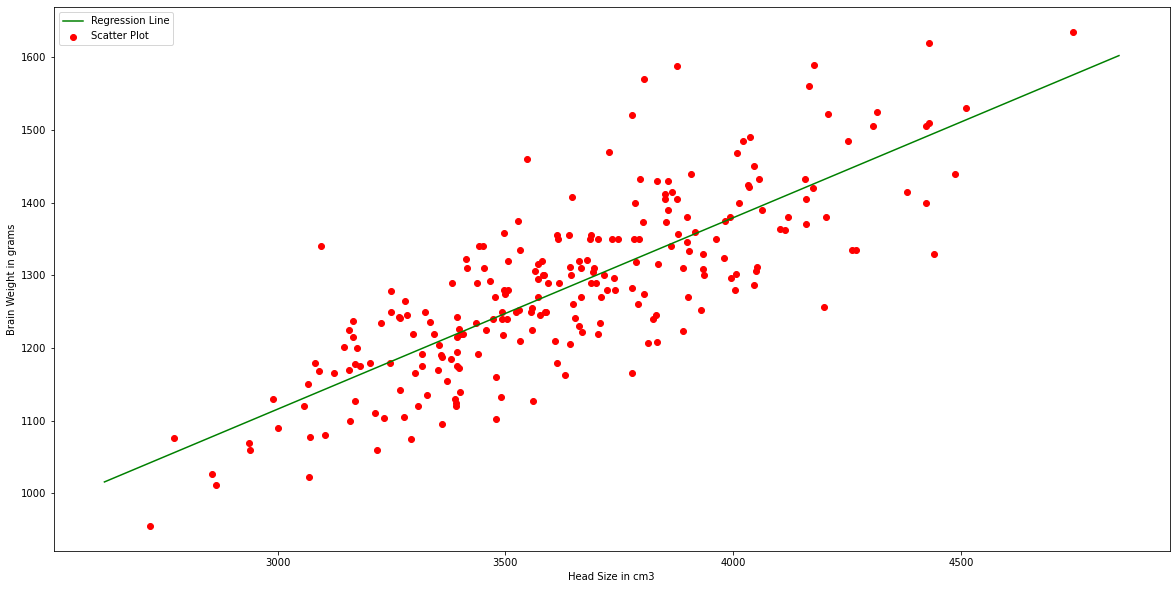

In [32]:
#Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating Line values x and y
x = np.linspace(min_x, max_x, 1000)
y = m * x + c

#Plotting Line
plt.plot(x, y, color='g', label='Regression Line')
#plotting Scatter Points
plt.scatter(X, Y, c='r', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [33]:
distActual = 0
distPredicted = 0

for i in range(n):
    y_pred = m * X[i] + c
    distPredicted += (y_pred - mean_y)**2
    distActual += (Y[i] - mean_y)**2

r2 = (distPredicted/distActual)
print(r2)

0.6393117199570001


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#convert X to single col
X = X.reshape((n,1))

#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X, Y)
#Y prediction
Y_pred = reg.predict(X)

#Calculating RMSE and R2 score
r2Score = r2_score(Y, Y_pred)

print(r2Score)


0.639311719957
0.639311719957


In [ ]:
print(reg.coef_)
print(reg.intercept_)